In [1]:
import pandas as pd
import numpy as np

Satisfaction Level: Employee satisfaction level.
Last Evaluation: Last performance evaluation score.
Number of Projects: Number of projects the employee has worked on.
Average Monthly Hours: Average monthly working hours.
Time Spent at Company: Number of years the employee has been with the company.
Work Accident: Whether the employee has had a work accident (1: Yes, 0: No).
Left: Whether the employee has left the company (1: Yes, 0: No).
Promotion in Last 5 Years: Whether the employee has been promoted in the last five years (1: Yes, 0: No).
Department: Department the employee belongs to.
Salary: Salary level (Low, Medium, High


In [7]:
# load dataset
hr = pd.read_csv("HR_DataSet.csv")
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [26]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#The dataset contains 14999 staff members
# compared to the previous year, satisfaction level reduced
# The average time a staff has spent in the company is 3 years


In [6]:
# Count of employees who left vs stayed
print(hr['left'].value_counts())

left
0    11428
1     3571
Name: count, dtype: int64


In [ ]:
# Out of the 14999 staff, 11428 are still there, while 3571 jave left 

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 600x400 with 0 Axes>

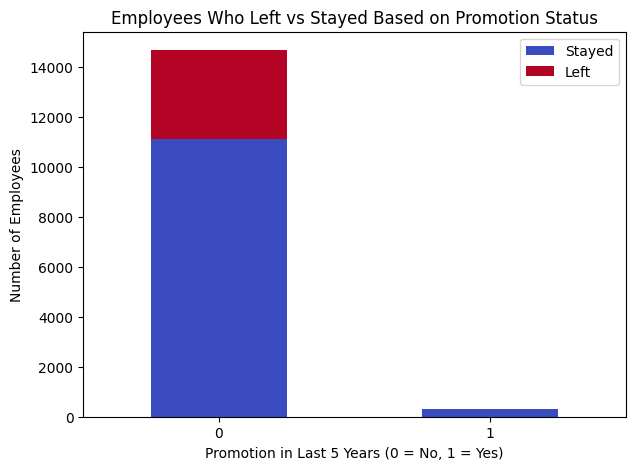

In [28]:
# Count of employees by promotion status and retention
promotion_vs_left = hr.groupby(['promotion_last_5years', 'left']).size().unstack()

# Plot
plt.figure(figsize=(6, 4))
promotion_vs_left.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(7,5))
plt.xlabel("Promotion in Last 5 Years (0 = No, 1 = Yes)")
plt.ylabel("Number of Employees")
plt.title("Employees Who Left vs Stayed Based on Promotion Status")
plt.legend(["Stayed", "Left"])
plt.xticks(rotation=0)
plt.show()

<Figure size 700x500 with 0 Axes>

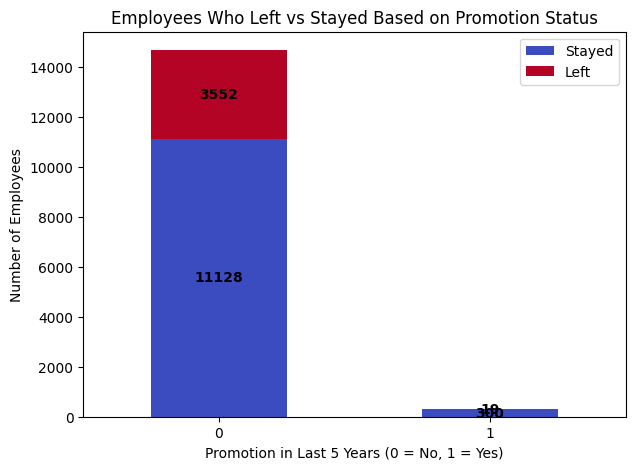

In [11]:
# Count of employees by promotion status and retention
promotion_vs_left = hr.groupby(['promotion_last_5years', 'left']).size().unstack()

# Plot
plt.figure(figsize=(7, 5))
ax = promotion_vs_left.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(7, 5))

plt.xlabel("Promotion in Last 5 Years (0 = No, 1 = Yes)")
plt.ylabel("Number of Employees")
plt.title("Employees Who Left vs Stayed Based on Promotion Status")
plt.xticks(rotation=0)
plt.legend(["Stayed", "Left"])

# Add count labels on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # Avoid labeling bars with zero height
        x, y = p.get_x() + width / 2, p.get_y() + height / 2
        ax.text(x, y, f"{int(height)}", ha='center', va='center', fontsize=10, color="black", fontweight="bold")

plt.show()

In [ ]:
# Most of those that left had not had a promotion in the last 5 years.

<Figure size 700x500 with 0 Axes>

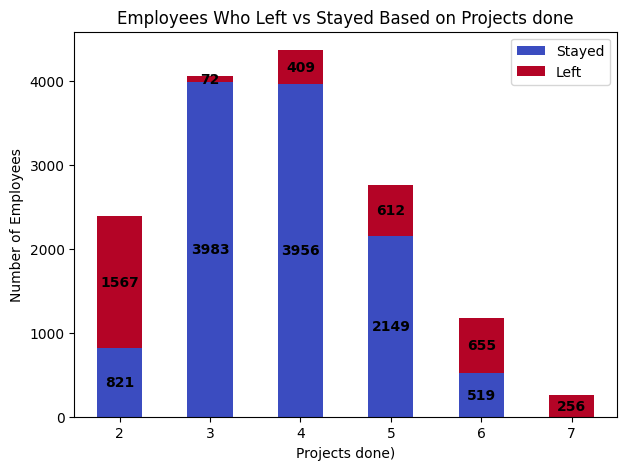

In [12]:
# Count of employees by number of projects and retention
projects_vs_left = hr.groupby(['number_project', 'left']).size().unstack()

# Plot
plt.figure(figsize=(7, 5))
ax = projects_vs_left.plot(kind='bar', stacked=True, colormap="coolwarm", figsize=(7, 5))

plt.xlabel("Projects done)")
plt.ylabel("Number of Employees")
plt.title("Employees Who Left vs Stayed Based on Projects done")
plt.xticks(rotation=0)
plt.legend(["Stayed", "Left"])

# Add count labels on bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0:  # Avoid labeling bars with zero height
        x, y = p.get_x() + width / 2, p.get_y() + height / 2
        ax.text(x, y, f"{int(height)}", ha='center', va='center', fontsize=10, color="black", fontweight="bold")

plt.show()

In [ ]:
# employees that had too few projects left, also, those that had too many projects left.

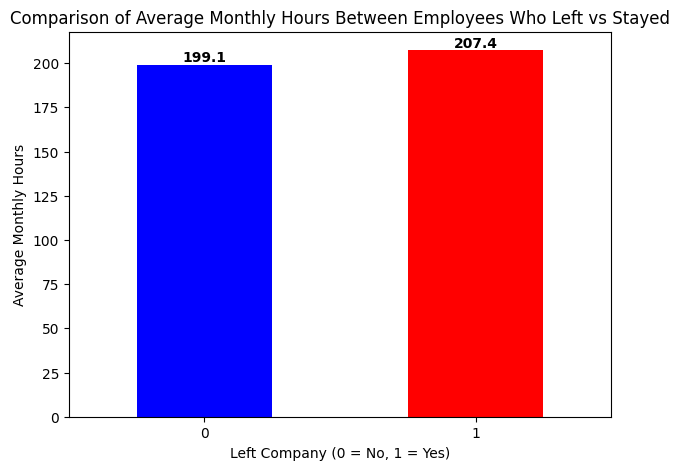

In [13]:
# Calculate average monthly hours for both groups
avg_hours = hr.groupby("left")["average_montly_hours"].mean()

# Bar Plot
plt.figure(figsize=(7, 5))
ax = avg_hours.plot(kind="bar", color=["blue", "red"])

plt.xlabel("Left Company (0 = No, 1 = Yes)")
plt.ylabel("Average Monthly Hours")
plt.title("Comparison of Average Monthly Hours Between Employees Who Left vs Stayed")
plt.xticks(rotation=0)

# Add labels on bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), f"{p.get_height():.1f}", ha='center', va='bottom', fontsize=10, fontweight="bold")

plt.show()

In [ ]:
# thse that left have been observed to have spent more monthly hours in the office than those that have not left

C:\Users\joyle\anaconda3\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\joyle\anaconda3\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\joyle\anaconda3\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\joyle\anaconda3\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  

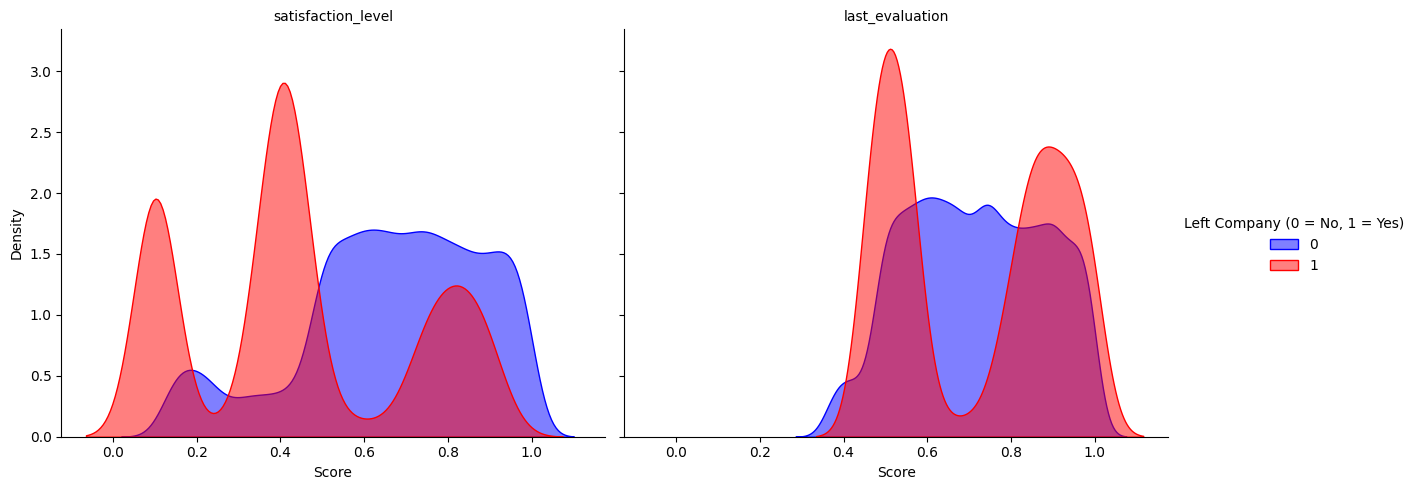

In [14]:
# Transform data for visualization
hr_melted = hr.melt(id_vars=["left"], value_vars=["satisfaction_level", "last_evaluation"],
                    var_name="Metric", value_name="Score")

# Create the FacetGrid
g = sns.FacetGrid(hr_melted, col="Metric", hue="left", height=5, aspect=1.2, palette={0: "blue", 1: "red"})

# Use KDE Plot or Histogram
g.map(sns.kdeplot, "Score", shade=True, alpha=0.5)

# Adjust labels
g.set_axis_labels("Score", "Density")
g.set_titles("{col_name}")
g.add_legend(title="Left Company (0 = No, 1 = Yes)")

# Show plot
plt.show()

In [ ]:
# The above shows that those that left had previously shown high last satisfaction, but the reduced in the satisfaction level.
# Those that are still there showed litte change between the 2 scores.

C:\Users\joyle\AppData\Local\Temp\ipykernel_16276\2447131591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="time_spend_company", y="satisfaction_level", data=hr, palette="coolwarm")


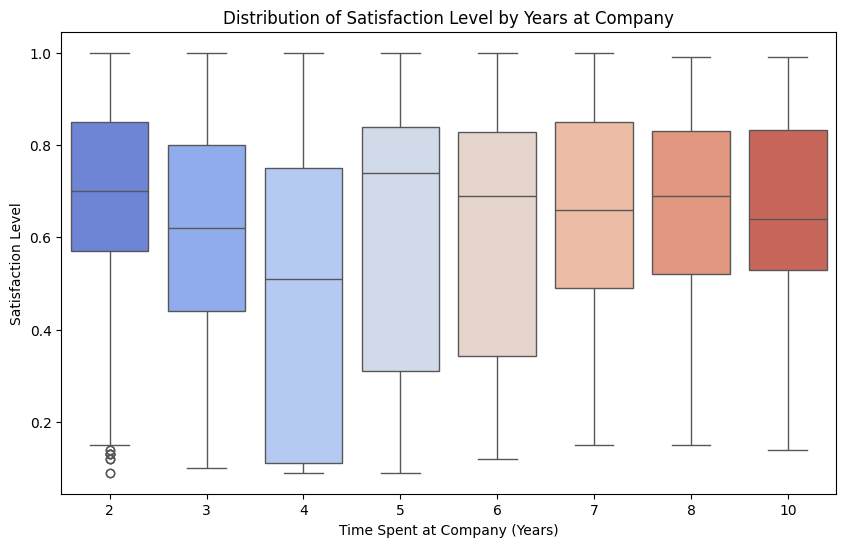

In [15]:
# Boxplot: Satisfaction Level by Time Spent at Company
plt.figure(figsize=(10, 6))
sns.boxplot(x="time_spend_company", y="satisfaction_level", data=hr, palette="coolwarm")
plt.xlabel("Time Spent at Company (Years)")
plt.ylabel("Satisfaction Level")
plt.title("Distribution of Satisfaction Level by Years at Company")
plt.show()

C:\Users\joyle\AppData\Local\Temp\ipykernel_16276\2509249647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="time_spend_company", y="satisfaction_level", data=hr, palette="coolwarm", inner="box")


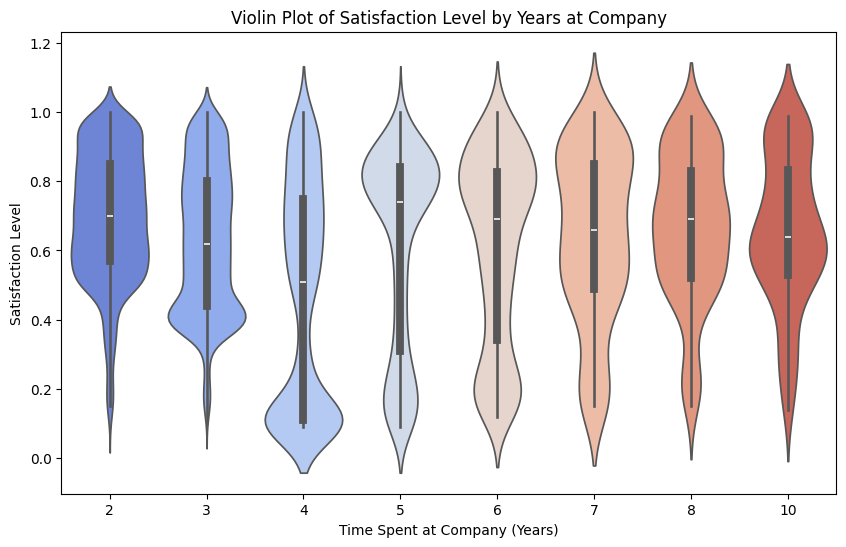

In [16]:
# Violin Plot: Satisfaction Level by Time Spent at Company
plt.figure(figsize=(10, 6))
sns.violinplot(x="time_spend_company", y="satisfaction_level", data=hr, palette="coolwarm", inner="box")
plt.xlabel("Time Spent at Company (Years)")
plt.ylabel("Satisfaction Level")
plt.title("Violin Plot of Satisfaction Level by Years at Company")
plt.show()

In [ ]:
# Wider sections indicate where most employees' satisfaction levels are concentrated.
# Narrower sections show less frequent satisfaction levels.
# The white dot inside the violin plot represents the median satisfaction level.

C:\Users\joyle\AppData\Local\Temp\ipykernel_16276\566421726.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="time_spend_company", y="satisfaction_level", data=mean_satisfaction, palette="coolwarm")


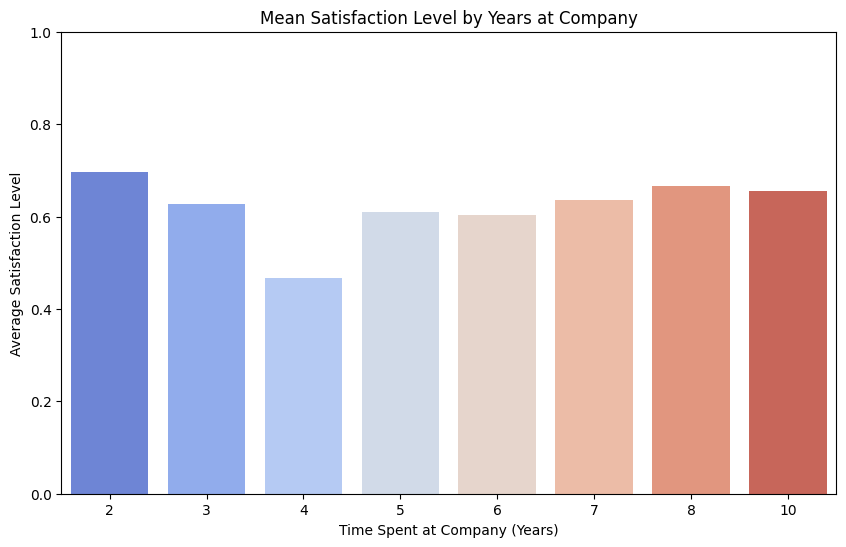

In [17]:
# Calculate mean satisfaction level per tenure
mean_satisfaction = hr.groupby("time_spend_company")["satisfaction_level"].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="time_spend_company", y="satisfaction_level", data=mean_satisfaction, palette="coolwarm")

# Labels and title
plt.xlabel("Time Spent at Company (Years)")
plt.ylabel("Average Satisfaction Level")
plt.title("Mean Satisfaction Level by Years at Company")
plt.ylim(0, 1)  # Since satisfaction level is likely between 0 and 1
plt.show()

In [ ]:
# long tenure employees have a high satisfaction score, and after 5 years, probably after promotion, satisfaction score improved significantly.

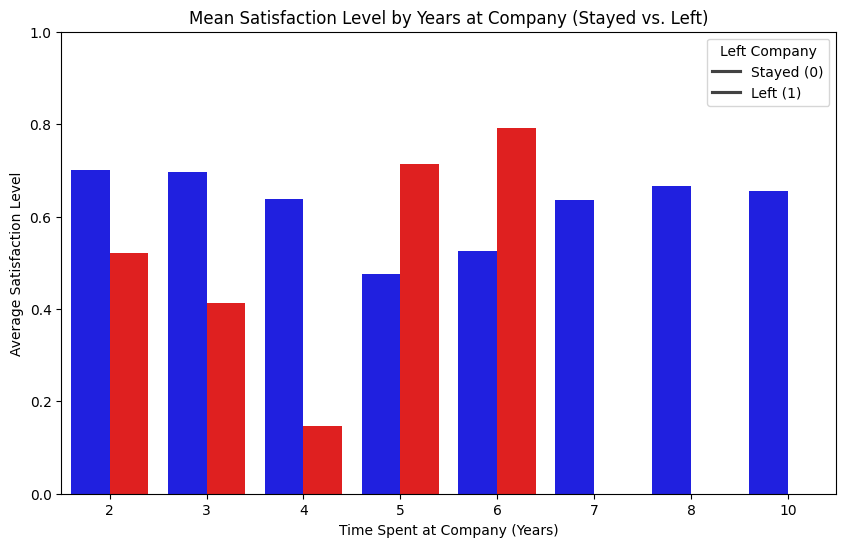

In [18]:
# Calculate mean satisfaction level per tenure, grouped by "left" status
mean_satisfaction = hr.groupby(["time_spend_company", "left"])["satisfaction_level"].mean().reset_index()

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="time_spend_company", y="satisfaction_level", hue="left", data=mean_satisfaction, palette=["blue", "red"])

# Labels and title
plt.xlabel("Time Spent at Company (Years)")
plt.ylabel("Average Satisfaction Level")
plt.title("Mean Satisfaction Level by Years at Company (Stayed vs. Left)")
plt.legend(title="Left Company", labels=["Stayed (0)", "Left (1)"])
plt.ylim(0, 1)  # Satisfaction level likely between 0 and 1
plt.show()

In [ ]:
# most of the staff that leave, the do so after promotion, however, long term or serving staff do not leave after 6 years.
# those that leave are noted to have higher satisfaction levels than those that stay.

Missing values

In [8]:
# Inspect missing values in each column
missing_values = hr.isnull().sum()
missing_values_percentage = (missing_values / len(hr)) * 100
missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})

missing_values_summary.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
satisfaction_level,0,0.0
last_evaluation,0,0.0
number_project,0,0.0
average_montly_hours,0,0.0
time_spend_company,0,0.0
Work_accident,0,0.0
left,0,0.0
promotion_last_5years,0,0.0
Department,0,0.0
salary,0,0.0


In [ ]:
# there are no missing values in the hr data

Encoding categorical variables; departmemt and salary

In [9]:
## Encoding salary column using Label encoding
# Check unique values in salary column
print("Unique salary values before encoding:", hr["salary"].unique())
# Strip spaces and apply case normalization
hr["salary"] = hr["salary"].str.strip().str.capitalize()
# Mapping dictionary
salary_mapping = {"Low": 0, "Medium": 1, "High": 2}

# Apply mapping safely
hr["salary"] = hr["salary"].map(salary_mapping)

# Check if any null values exist after mapping
print("Number of nulls after encoding:", hr["salary"].isnull().sum())

# Display first few rows
print(hr.head())

Unique salary values before encoding: ['low' 'medium' 'high']
Number of nulls after encoding: 0
   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3  

In [13]:
print(hr.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'],
      dtype='object')


In [12]:
# Apply One-Hot Encoding on the 'Department' column
hr = pd.get_dummies(hr, columns=["Department"], drop_first=True)  # Drop first to avoid dummy variable trap

# Check the transformed dataset
print(hr.head())

KeyError: "None of [Index(['Department'], dtype='object')] are in the [columns]"

In [14]:
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,True,False,False


In [15]:
hr[list(hr.filter(like="Department_"))] = hr.filter(like="Department_").astype(int)

In [16]:
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# the above now has the dataset having features like department that were boolean to 0 and 1...integers

In [17]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14999 non-null  float64
 1   last_evaluation         14999 non-null  float64
 2   number_project          14999 non-null  int64  
 3   average_montly_hours    14999 non-null  int64  
 4   time_spend_company      14999 non-null  int64  
 5   Work_accident           14999 non-null  int64  
 6   left                    14999 non-null  int64  
 7   promotion_last_5years   14999 non-null  int64  
 8   salary                  14999 non-null  int64  
 9   Department_RandD        14999 non-null  int32  
 10  Department_accounting   14999 non-null  int32  
 11  Department_hr           14999 non-null  int32  
 12  Department_management   14999 non-null  int32  
 13  Department_marketing    14999 non-null  int32  
 14  Department_product_mng  14999 non-null

Checking for outliers

C:\Users\joyle\AppData\Local\Temp\ipykernel_10908\520737735.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=num_cols, palette="coolwarm")


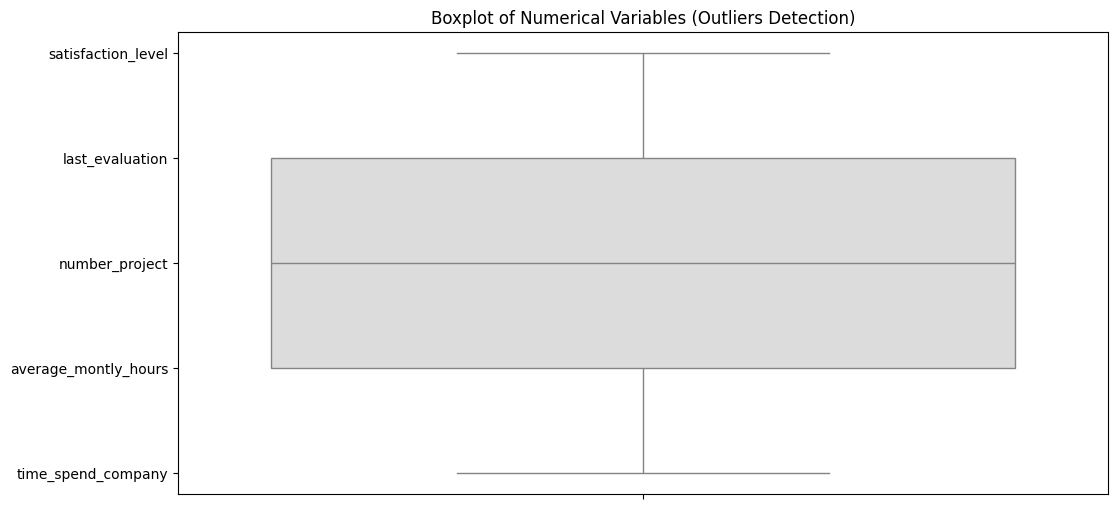

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select numerical columns for histogram analysis
num_cols = ["satisfaction_level", "last_evaluation", "number_project", 
            "average_montly_hours", "time_spend_company"]
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_cols, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Variables (Outliers Detection)")
plt.show()

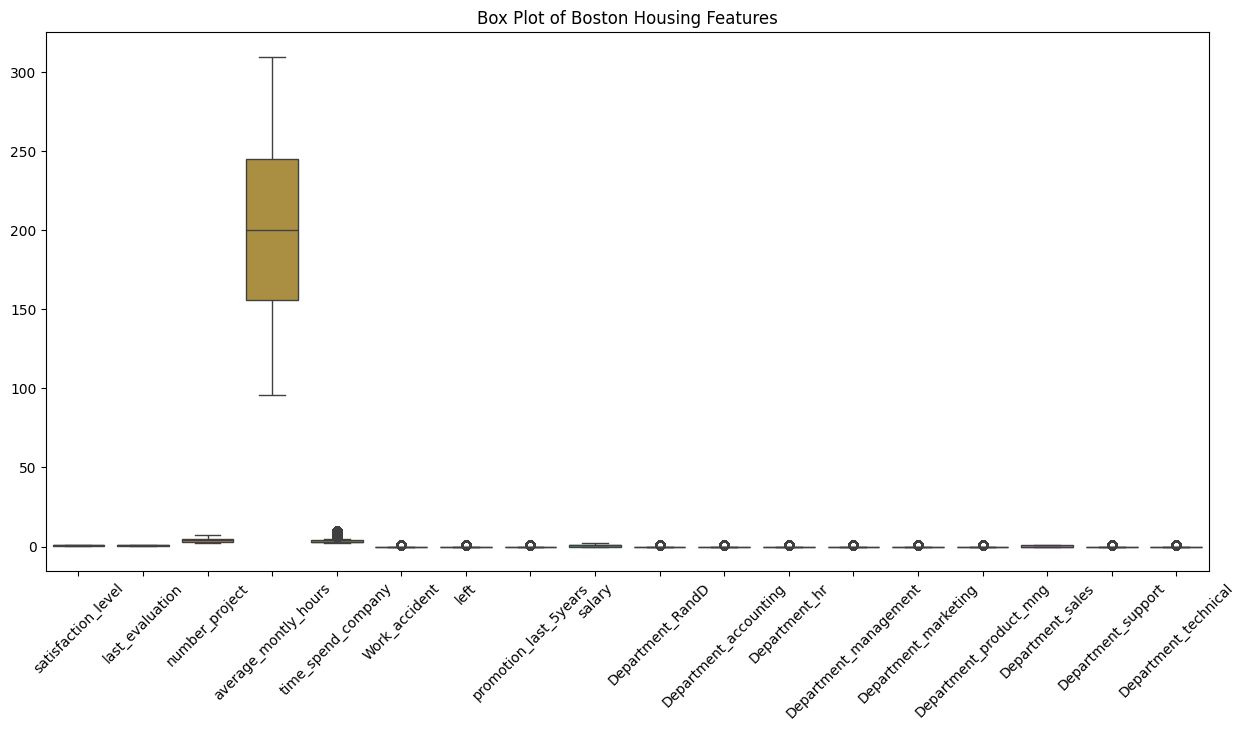

In [20]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=hr)
plt.xticks(rotation=45)  # Rotate labels for readability
plt.title('Box Plot of Boston Housing Features')
plt.show()

<Figure size 1200x800 with 0 Axes>

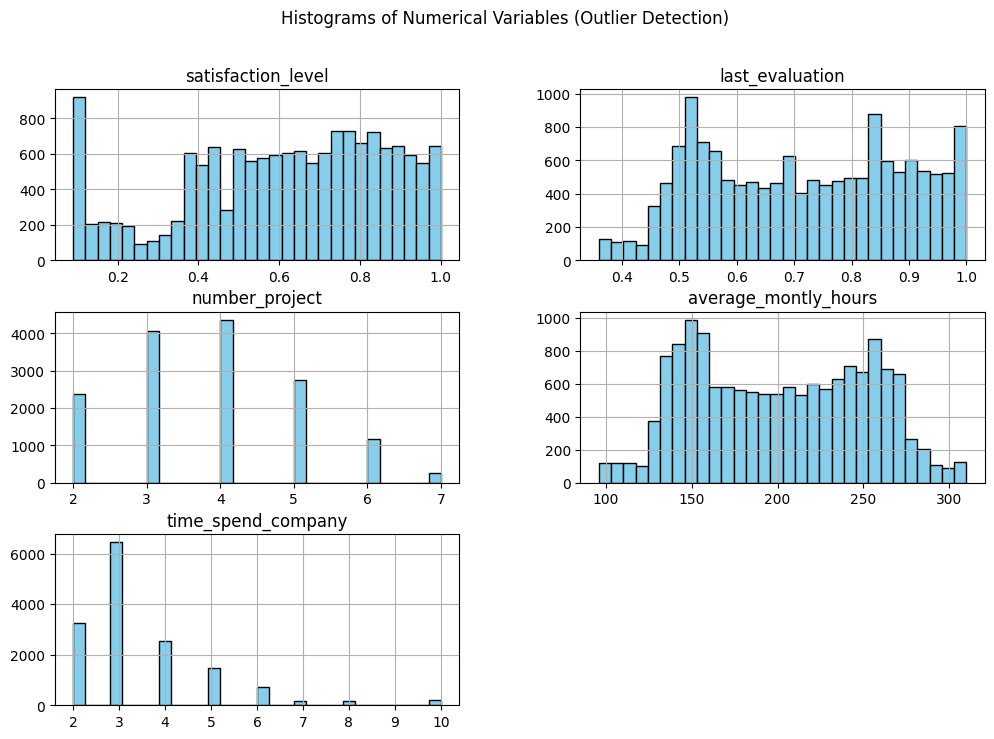

In [21]:

# Select numerical columns for histogram analysis
num_cols = ["satisfaction_level", "last_evaluation", "number_project", 
            "average_montly_hours", "time_spend_company"]

# Plot histograms
plt.figure(figsize=(12, 8))
hr[num_cols].hist(bins=30, figsize=(12, 8), color="skyblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Variables (Outlier Detection)")
plt.show()

In [52]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   satisfaction_level      14999 non-null  int32
 1   last_evaluation         14999 non-null  int32
 2   number_project          14999 non-null  int32
 3   average_montly_hours    14999 non-null  int32
 4   time_spend_company      14999 non-null  int32
 5   Work_accident           14999 non-null  int32
 6   left                    14999 non-null  int32
 7   promotion_last_5years   14999 non-null  int32
 8   salary                  14999 non-null  int32
 9   Department_RandD        14999 non-null  int32
 10  Department_accounting   14999 non-null  int32
 11  Department_hr           14999 non-null  int32
 12  Department_management   14999 non-null  int32
 13  Department_marketing    14999 non-null  int32
 14  Department_product_mng  14999 non-null  int32
 15  Department_sales   

using log transformation on the numeric features to deal with outliers

In [22]:
import numpy as np

# List of numeric features to transform (excluding categorical & binary features)
num_features = ["satisfaction_level", "last_evaluation", "number_project", 
                "average_montly_hours", "time_spend_company"]

# Apply log transformation (adding 1 to avoid log(0))
hr[num_features] = hr[num_features].apply(lambda x: np.log1p(x))  # log1p(x) = log(x + 1)

In [23]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.322083,0.425268,1.098612,5.062595,1.386294,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.587787,0.620576,1.791759,5.572154,1.945910,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.104360,0.631272,2.079442,5.609472,1.609438,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.542324,0.625938,1.791759,5.411646,1.791759,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.314811,0.418710,1.098612,5.075174,1.386294,0,1,0,0,0,0,0,0,0,0,1,0,0


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only the independent numerical features
X = hr.drop(columns=["left"])  # Exclude the target variable

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)

                   Feature         VIF
0       satisfaction_level    9.380484
1          last_evaluation   36.493296
2           number_project   47.323773
3     average_montly_hours  100.169852
4       time_spend_company   29.274262
5            Work_accident    1.176460
6    promotion_last_5years    1.057029
7                   salary    1.938337
8         Department_RandD    1.626163
9    Department_accounting    1.608843
10           Department_hr    1.584791
11   Department_management    1.557675
12    Department_marketing    1.687204
13  Department_product_mng    1.713467
14        Department_sales    4.290304
15      Department_support    2.764248
16    Department_technical    3.157414


In [ ]:
# there is very high VIF in last_evaluation, number_project, average_montly_hours and time_spend_company

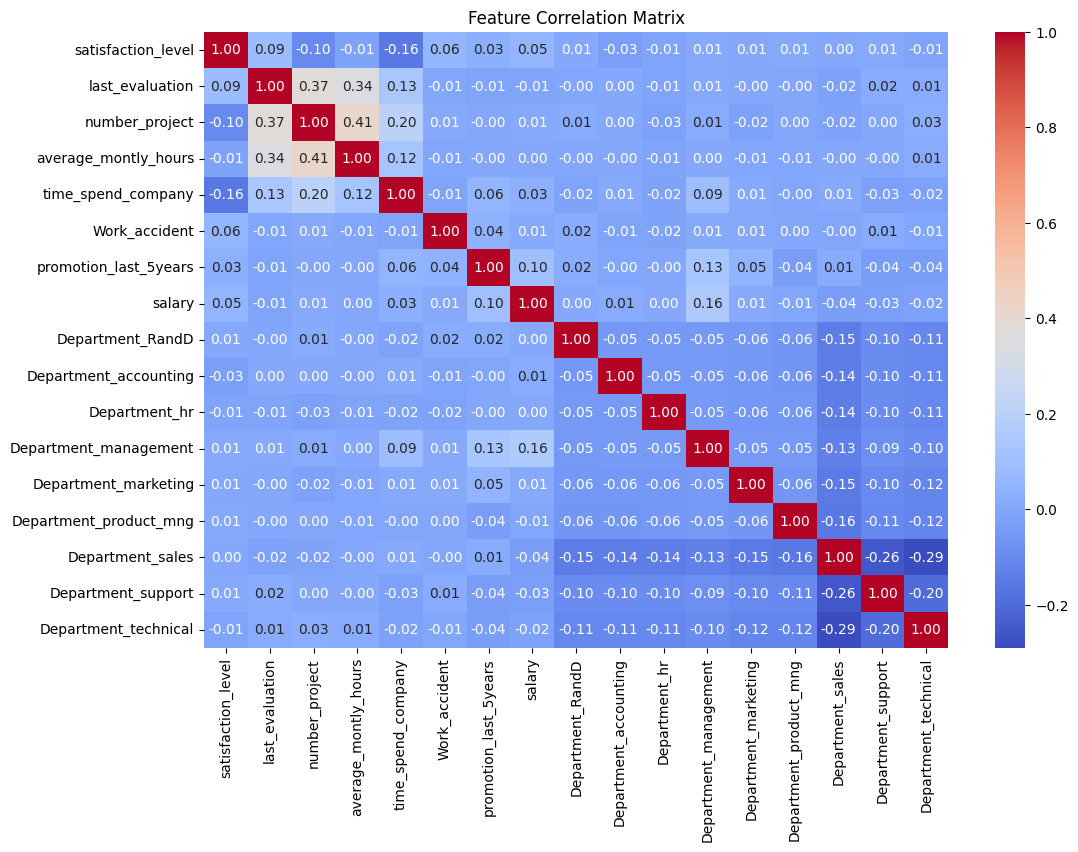

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

Since VIF values for some features are extremely high (above 10, especially for average_montly_hours, number_project, and last_evaluation), Lasso is a better choice because it will drop some of these features and simplify the model.

In [28]:
from sklearn.model_selection import train_test_split

X = hr.drop(columns=["left"])  # Exclude the target
y = hr["left"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [29]:
from sklearn.linear_model import LogisticRegression

ridge_log_reg = LogisticRegression(penalty="l2", solver="liblinear", max_iter=1000, C=1.0)
ridge_log_reg.fit(X_train, y_train)  # Train the model

# Predictions
y_pred = ridge_log_reg.predict(X_test)

In [30]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.817

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      2286
           1       0.67      0.46      0.55       714

    accuracy                           0.82      3000
   macro avg       0.76      0.70      0.72      3000
weighted avg       0.80      0.82      0.80      3000



In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = hr.drop(columns=["left"])  # Exclude target variable
y = hr["left"].astype(int)  # Ensure target is binary (0 or 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply standardization ONLY to X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data, transform training data
X_test = scaler.transform(X_test)  # Transform test data using same scaler

# Now, train Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = log_reg.predict(X_test)

In [32]:
# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.817

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89      2286
           1       0.66      0.47      0.55       714

    accuracy                           0.82      3000
   macro avg       0.76      0.70      0.72      3000
weighted avg       0.80      0.82      0.81      3000



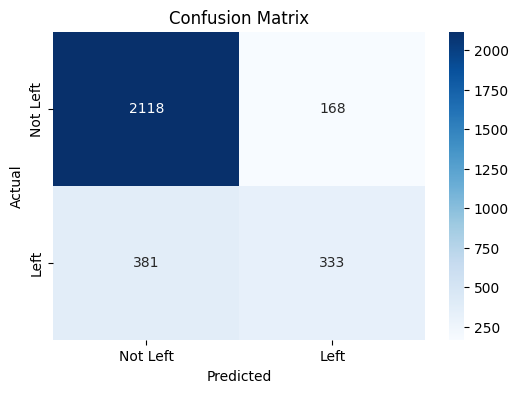

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2286
           1       0.66      0.47      0.55       714

    accuracy                           0.82      3000
   macro avg       0.76      0.70      0.72      3000
weighted avg       0.80      0.82      0.81      3000



In [33]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Left", "Left"], yticklabels=["Not Left", "Left"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Print classification report (for precision, recall, f1-score)
print(classification_report(y_test, y_pred))

From the above, 2118 is the True Negative, 168 False Positive, 381 False Negative and 333 True Positive.

C:\Users\joyle\anaconda3\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


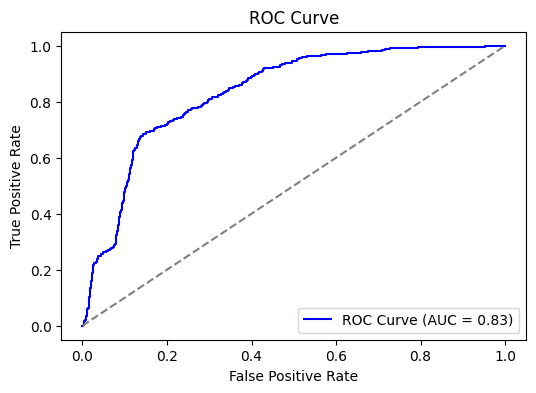

ROC AUC Score: 0.8349


In [34]:
# Evaluating our logistic model using ROC-AUC 
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for positive class (1)
y_probs = ridge_log_reg.predict_proba(X_test)[:, 1]  

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color="blue", label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Print AUC Score
print(f"ROC AUC Score: {auc_score:.4f}")

The ROC AUC score of 0.83 shows the logistic model is a good one


In [35]:
hr.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.322083,0.425268,1.098612,5.062595,1.386294,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.587787,0.620576,1.791759,5.572154,1.945910,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.104360,0.631272,2.079442,5.609472,1.609438,0,1,0,1,0,0,0,0,0,0,1,0,0
3,0.542324,0.625938,1.791759,5.411646,1.791759,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.314811,0.418710,1.098612,5.075174,1.386294,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# from the above, we note that different features have similar scales, this is because we perfomed on independent features

How to Interpret the Heatmap?
High correlation (closer to +1 or -1) → Indicates multicollinearity.;
Low correlation (closer to 0) → Indicates weak or no linear relationship.
+VE value means variables move together
-ve value means variables have inverse rlshp
Look for pairs with correlations above ±0.7 → These may cause multicollinearity issues.

1. Fine-Tuning the Model (Optional)
If you want to improve the model further, consider:
✅ Hyperparameter tuning – Adjust C (regularization strength) for Ridge regression (LogisticRegression(C=value)).
✅ Feature engineering – Try polynomial features, interaction terms, or different transformations.
✅ Handling class imbalance (if needed) – Use techniques like SMOTE (oversampling), undersampling, or class weights (class_weight='balanced').

2. Model deployment